In [30]:
import pandas as pd

df = pd.read_excel('data/xlsx/PreciosOF.xlsx')
print(df)


      Unnamed: 0      Fecha  Compra   Venta
0            0.0 2023-02-03  186.40  195.40
1            1.0 2023-02-02  186.14  195.14
2            2.0 2023-02-01  185.95  194.95
3            3.0 2023-01-31  185.36  194.36
4            4.0 2023-01-30  185.07  194.07
...          ...        ...     ...     ...
3225      3225.0 2010-01-07    3.79    3.83
3226      3226.0 2010-01-06    3.79    3.83
3227      3227.0 2010-01-05    3.78    3.82
3228      3228.0 2010-01-04    3.78    3.82
3229         NaN 2023-02-04    0.00  195.40

[3230 rows x 4 columns]


C:\Users\rodri\AppData\Local\Temp\ipykernel_5828\3650239386.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.read_excel('data/xlsx/PreciosOF.xlsx')


In [31]:
df = pd.DataFrame(df)
df

,Unnamed: 0,Fecha,Compra,Venta
0,0.0,2023-02-03,186.40,195.40
1,1.0,2023-02-02,186.14,195.14
2,2.0,2023-02-01,185.95,194.95
3,3.0,2023-01-31,185.36,194.36
4,4.0,2023-01-30,185.07,194.07
...,...,...,...,...
3225,3225.0,2010-01-07,3.79,3.83
3226,3226.0,2010-01-06,3.79,3.83
3227,3227.0,2010-01-05,3.78,3.82
3228,3228.0,2010-01-04,3.78,3.82


In [32]:
df.head()

,Unnamed: 0,Fecha,Compra,Venta
0,0.0,2023-02-03,186.40,195.40
1,1.0,2023-02-02,186.14,195.14
2,2.0,2023-02-01,185.95,194.95
3,3.0,2023-01-31,185.36,194.36
4,4.0,2023-01-30,185.07,194.07


In [33]:
df.index # it is an attribute, not function

RangeIndex(start=0, stop=3230, step=1)

In [34]:
df.drop(df.index[0], inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)
df.rename(columns={0: 'Fecha', 1: 'Compra', 2: 'Venta'}, inplace=True)
df

,Fecha,Compra,Venta
1,2023-02-02,186.14,195.14
2,2023-02-01,185.95,194.95
3,2023-01-31,185.36,194.36
4,2023-01-30,185.07,194.07
5,2023-01-27,184.06,193.06
...,...,...,...
3225,2010-01-07,3.79,3.83
3226,2010-01-06,3.79,3.83
3227,2010-01-05,3.78,3.82
3228,2010-01-04,3.78,3.82


In [35]:
df.describe()

,Compra,Venta
count,3229.000000,3229.000000
mean,35.356999,37.300359
std,42.171069,44.771991
min,0.000000,3.820000
25%,5.130000,5.190000
50%,14.880000,15.280000
75%,57.970000,62.980000
max,186.140000,195.400000


In [36]:
df['Compra'] = pd.to_numeric(df['Compra'])
df['Venta'] = pd.to_numeric(df['Venta'])

In [37]:
df.to_pickle('data/pkl/PreciosOF.xlsx.pkl')

In [38]:
df.set_index('Fecha', inplace=True)
df.index = pd.to_datetime(df.index, format='%d-%m-%Y')

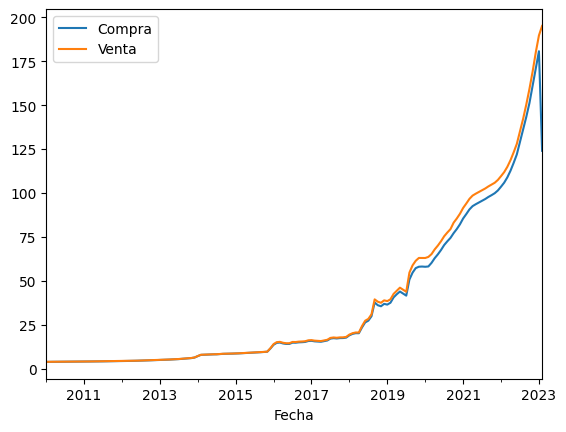

In [39]:
df.resample(rule='M').mean().plot(); # Historico

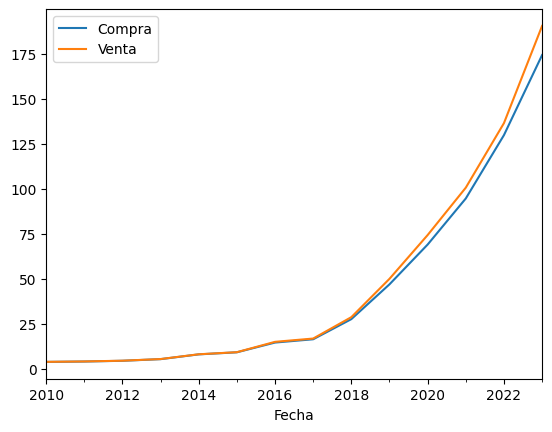

In [40]:
df.resample(rule='AS').mean().plot(); # AS Primer año

[Text(0.5, 1.0, 'Promedio valor Dolar')]

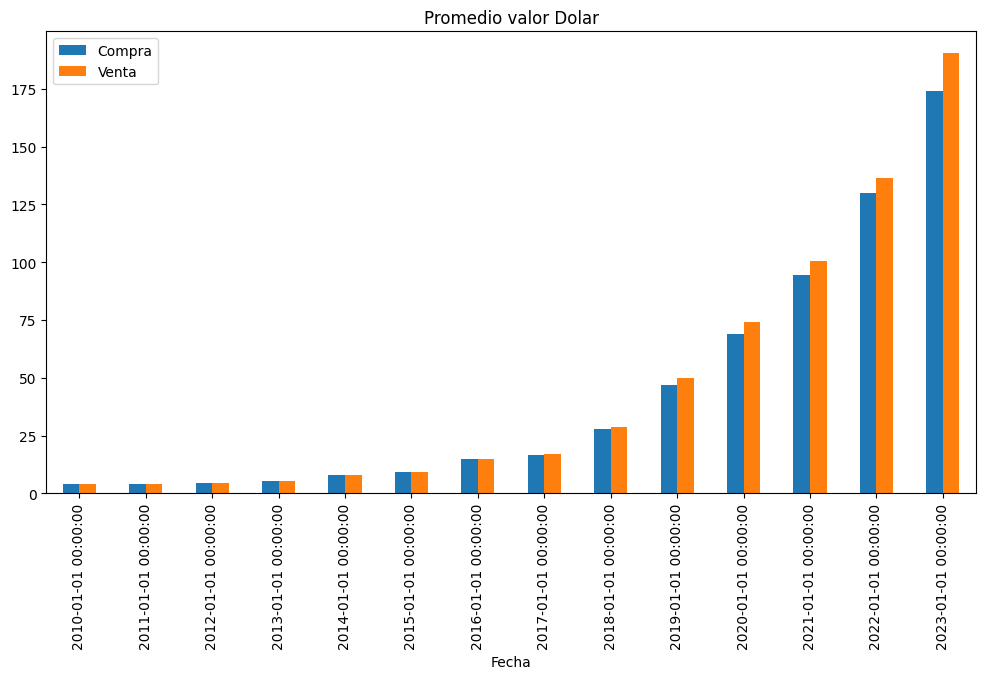

In [41]:
ax = df.resample(rule='AS').mean().plot.bar(figsize=(12,6))
ax.set(title='Promedio valor Dolar')

<AxesSubplot: xlabel='Fecha'>

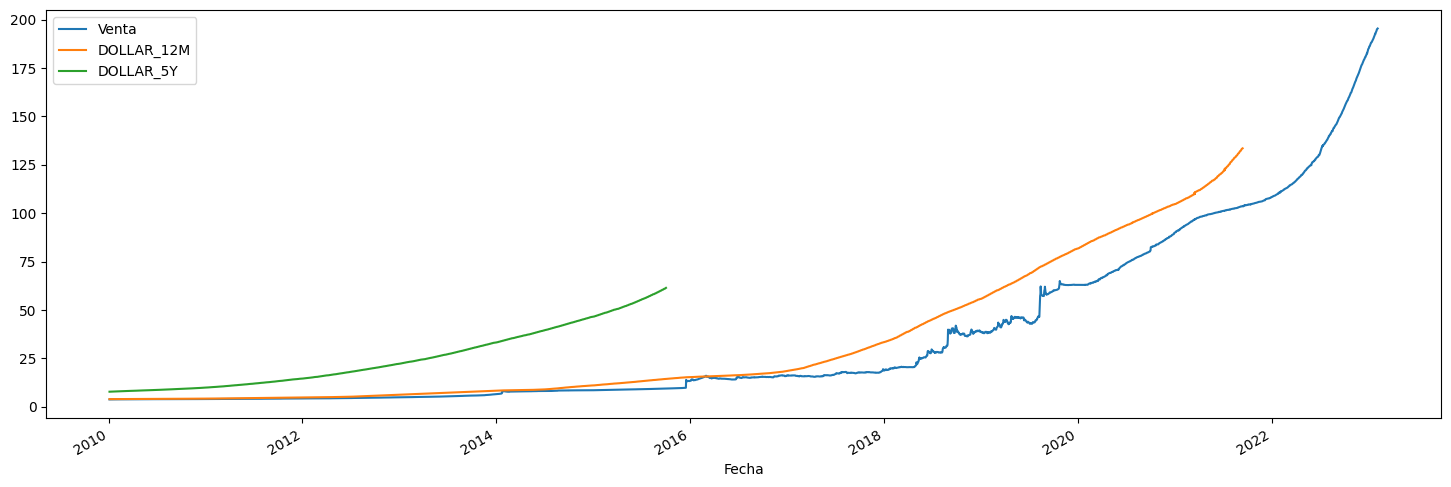

In [42]:
df['DOLLAR_12M'] = df['Venta'].rolling(window=365).mean()
df['DOLLAR_5Y'] = df['Venta'].rolling(window=365*5+1).mean()
df[['Venta','DOLLAR_12M','DOLLAR_5Y']].plot(figsize=(18,6))

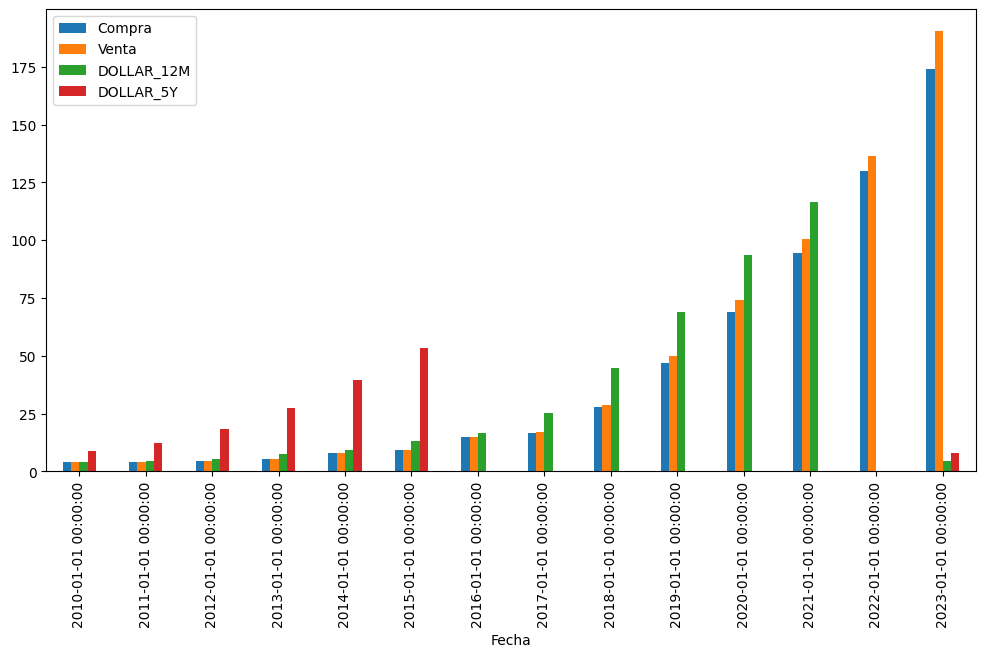

In [43]:
ax = df.resample(rule='AS').mean().plot.bar(figsize=(12,6))

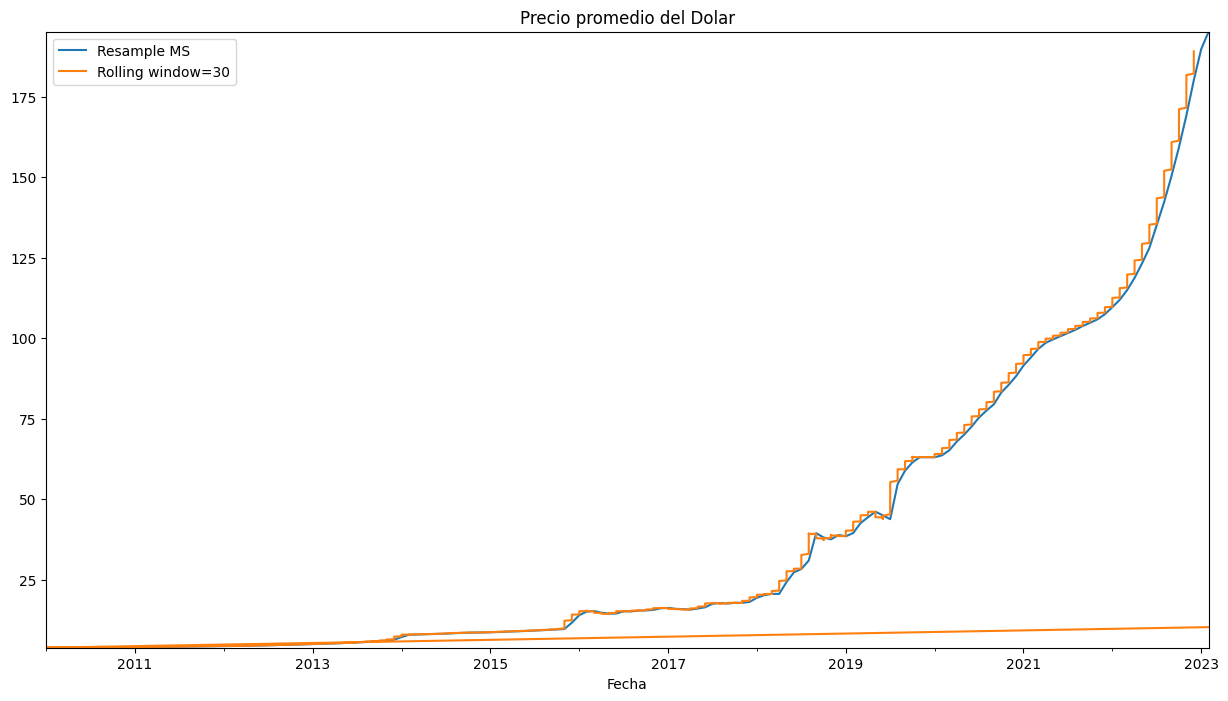

In [44]:
ax = df['Venta'].resample(rule='M').mean().plot(figsize=(15,8), label='Resample MS') # monthly resampled mean
ax.autoscale(tight=True)
df.rolling(window=30).mean()['Venta'].plot(label='Rolling window=30') # monthly rolling windows/moving average
ax.set(title='Precio promedio del Dolar')
ax.legend()

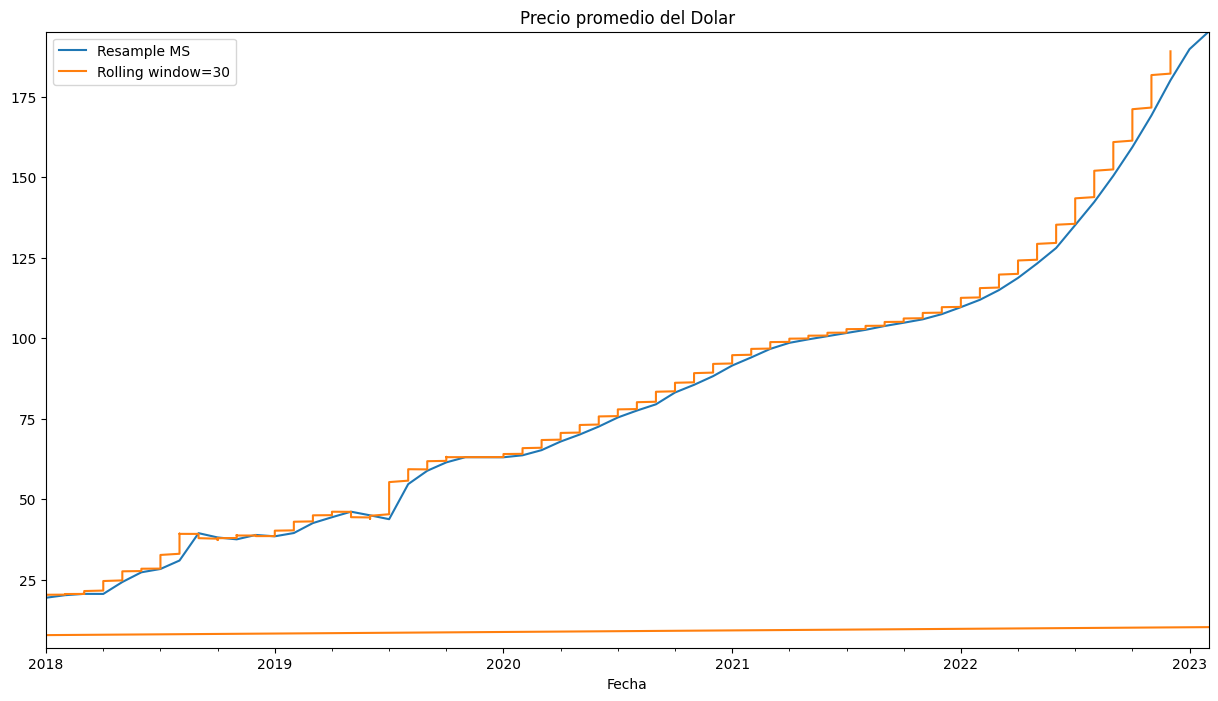

In [45]:
from datetime import datetime

ax = df['Venta'].resample(rule='M').mean().plot(xlim=['2018-01-01', datetime.now()], figsize=(15,8), label='Resample MS')
ax.autoscale(tight=True)
df.rolling(window=30).mean()['Venta'].plot(xlim=['2018-01-01',datetime.now()],label='Rolling window=30')
ax.set(title='Precio promedio del Dolar')
ax.legend()


<AxesSubplot: xlabel='Fecha'>

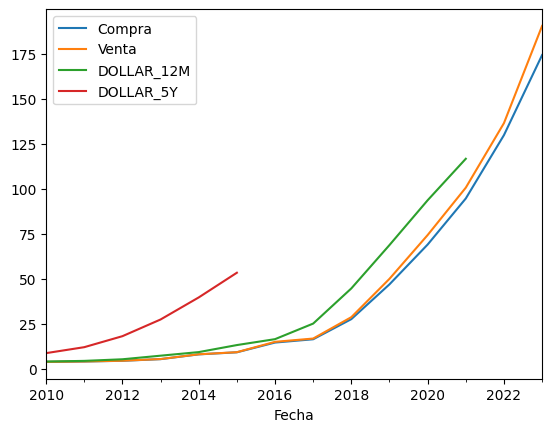

In [46]:
df.resample(rule='1y').mean().plot() #1y = 1 years

<AxesSubplot: xlabel='Fecha'>

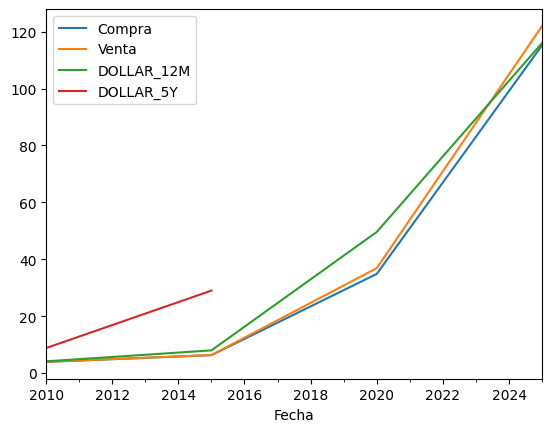

In [47]:
df.resample(rule='5y').mean().plot() #5y = 5 years

<AxesSubplot: xlabel='Fecha'>

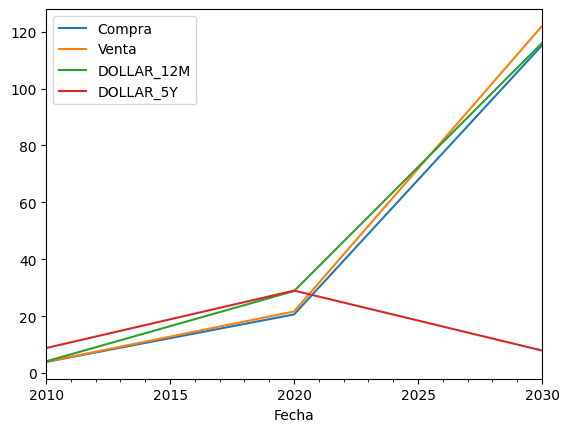

In [48]:
df.resample(rule='10y').mean().plot()

<AxesSubplot: xlabel='Fecha'>

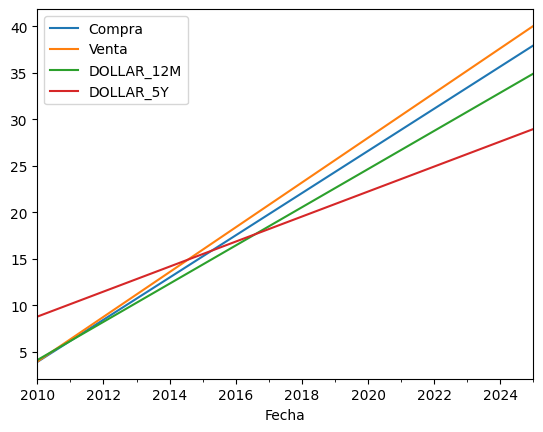

In [49]:
df.resample(rule='15y').mean().plot()